In [1]:
#![title](img/picture.png)
#在机器学习中，分类问题中的某个类别叫作类（class）。数据点叫作样本（sample）。某个样本对应的类叫作标签（label）

In [2]:
# 向量（1D 张量）
# 数字组成的数组叫作向量（vector）或一维张量（1D 张量）。一维张量只有一个轴。下面是一个Numpy 向量。
import numpy as np
x = np.array([12, 3, 6, 14, 7])

# 这个向量有5 个元素，所以被称为5D 向量。不要把5D 向量和5D 张量弄混！ 5D 向量只有一个轴，沿着轴有5 个维度，而5D 张量有5 个轴
# （沿着每个轴可能有任意个维度）
print(x)
print(x.ndim)

[12  3  6 14  7]
1


In [3]:
# 向量组成的数组叫作矩阵（matrix）或二维张量（2D 张量）。矩阵有2 个轴（通常叫作行和列）。你可以将矩阵直观地理解为数字组成的矩形网格。
# 下面是一个Numpy 矩阵。
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
print(x.ndim)
print(x.shape)
#第一个轴上的元素叫作列（column），第二个轴上的元素叫作行（row）。在上面的例子中，[5, 78, 2, 34, 0] 是x 的第一列，[5, 6, 7] 是第一行

2
(3, 5)


In [4]:
# TensorFlow用張量這種數據結構來表示所有的數據.你可以把一個張量想像成一個n維的數組或列表.一個張量有一個靜態類型和動態類型的維數.
# 張量可以在圖中的節點之間流通.

# 在TensorFlow系統中，張量的維數來被描述為階.但是張量的階和矩陣的階並不是同一個概念.張量的階（有時是關於如順序或度數或者是n維）是張量維數
# 的一個數量描述.比如，下面的張量（使用Python中list定義的）就是2階.

# t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# 你可以認為一個二階張量就是我們平常所說的矩陣，一階張量可以認為是一個向量.對於一個二階張量你可以用語句t[i, j]來訪問其中的任何元素.而對於
# 三階張量你可以用't[i, j, k]'來訪問其中的任何元素.

# 阶	数学实例	Python 例子
# 0	纯量 (只有大小)	s = 483
# 1	向量(大小和方向)	v = [1.1, 2.2, 3.3]
# 2	矩阵(数据表)	m = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# 3	3阶张量 (数据立体)	t = [[[2], [4], [6]], [[8], [10], [12]], [[14], [16], [18]]]

# 張量是所有深度學習框架中最核心的組件，因為後續的所有運算和優化算法都是基於張量進行的。 幾何代​​數中定義的張量是基於向量和矩陣的推廣，通俗一點
# 理解的話，我們可以將純量視為零階張量，向量視為一階張量，那麼矩陣就是二階張量。

# 舉例來說，我們可以將任意一張RGB彩色圖片表示成一個三階張量（三個維度分別是圖片的高度、寬度和色彩數據）。 如下圖所示是一張普通的水果圖片，按照
# RGB三原色表示，其可以拆分為三張紅色、綠色和藍色的灰度圖片，如果將這種表示方法用張量的形式寫出來，就是圖中最下方的那張表格

![title](img/27.png)
![title](img/29.png)

In [5]:
# 張量(Tensor)
# tensorflow運算中最基本的單位，通常是高維度的矩陣，舉個例子如果我們需要一個可以拿來做圖像辨識的Model，Input的圖片即可用一個2維的tensor表示
# ，圖上的每個像素(pixel)都是tensor中的element，同樣的方式也可以用三維的張量來表示一張彩色的圖，第三個維度長度就是3分別代表RGB三原色在現在
# 這個(x,y)位置的pixel的值。

# 張量的型態主要有三種Constant、Variable、Placeholder

# 如果有寫過其他程式語言的應該可以很輕易地了解Constant 和 Variable的意義，沒學過也沒關係，可以就如字面上的意義了解Constant就是不可變的常數
# 、Variable即是變數，Placeholder則是tensorflow中比較特別的概念，創建Tensor的方式也很簡單

import tensorflow as tf
node1 = tf.constant(3) # 常數3的tensor
node2 = tf.constant(4) # 常數4的tensor
print(node1, node2)

# 我們來看看print出來的結果

# Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)

Tensor("Const:0", shape=(), dtype=int32) Tensor("Const_1:0", shape=(), dtype=int32)


In [6]:
# node1、node2 分別代表了兩個Const和Tensor，還可以注意到如果我們沒有特別指定data type，default是使用float32作為初始值，但為什麼我們
# 看不到我們賦予這兩個tensor的值(3、4)呢?
# 這時候我們就必須執行下面這段程式碼

sess = tf.Session() # 創建一個tensorflow session
print(sess.run([node1, node2])) # 把node1 node2丟進session中run

[3, 4]


In [7]:
# 運算圖(Computational Graph)
# 在開始之前我們先理解一下Tensorflow主要的運作流程分為以下兩個部分

# 建立運算圖(Build)
# 其實這個部分就是所謂的建立模型(Build Model)，決定整個運算流程，這也是tensorflow和其他框架最大的不同，我們必須事先定義好Graph的長相，
# 舉下圖為例，如果想用tensorflow算 3+4=7 那我們該怎麼做呢？首先我們要先建立一個用來做加法運算的Graph如下圖，就是把兩個Constant的tensor
# 做一個加法的運算。

![title](img/30.png)

In [8]:
node3 = tf.add(node1, node2) # 把前面創建的const tensor node1、node2相加
print("node3: ", node3) # node3就是相加後的結果
print("sess.run(node3): ",sess.run(node3)) 

node3:  Tensor("Add:0", shape=(), dtype=int32)
sess.run(node3):  7


In [9]:
# Placeholder
# 正如上面所提到，在Tensorflow中我們都是先建好Graph再決定資料的input與output，這時候我們就需要Placeholder來幫助我們在還沒有資料的時候先佔
# 個位子(正如其名)。

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # 這行等效於 adder_node = tf.add(a, b)
print(adder_node)

Tensor("add_1:0", dtype=float32)


![title](img/31.png)

In [10]:
# 用Placeholder實作的程式碼，跟前面用兩個Const Tensor相加最大的區別就是我們這邊並沒有賦予a、b任何值，而只是建立了一個讓a跟b兩個Tensor相加
# 的Graph。

print(sess.run(adder_node, {a: 3, b:4.5}))
# >> 7.5
# 接著我們當然又是找session幫我們執行這個Graph，可以看到在sess.run的參數中我們除了第一個參數指定了這次要run的Output外，在第二個參數我們
# 給了一個dictionary，這就是我們這次run的過程賦予a和b兩個Placeholder的值，因此adder_node的計算就會根據我們feed進去的資料作改變，在這邊
# 很顯然的答案就是3+4.5=7.5。

print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[3. 7.]


In [11]:
import tensorflow as tf

input_data = tf.constant([1,3,4,6])

rank_input_data = tf.rank(input_data)
result = tf.argmax(input_data,0)


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(rank_input_data))
    print(sess.run(result))

t = tf.constant([[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]])
sess = tf.Session()

print(sess.run(tf.shape(t)))
print(sess.run(tf.size(t)))
print(sess.run(tf.rank(t)))

1
3
[4 3]
12
2


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
I = mpimg.imread('20.jpg')
print (I.shape)
plt.imshow(I)

(3024, 4032, 3)


In [13]:
#为了具体说明，我们回头看一下MNIST 例子中处理的数据。首先加载MNIST 数据集
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [14]:
#接下来，我们给出张量train_images 的轴的个数，即ndim 属性。
print(train_images.ndim)

3


In [15]:
#下面是它的形状。
print(train_images.shape)

(60000, 28, 28)


In [16]:
#下面是它的数据类型，即dtype 属性。
print(train_images.dtype)

# 这里train_images 是一个由8 位整数组成的3D 张量。更确切地说，它是60000,个矩阵组成的数组，每个矩阵由28×28 个整数组成。每个这样的矩阵都是
# 一张灰度图像，元素取值范围为0~255。(60000 , 28 ,28 ,1)

uint8


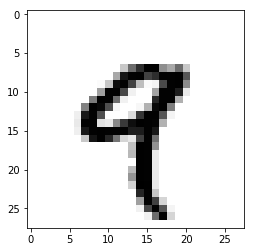

In [17]:
#我们用Matplotlib 库（Python 标准科学套件的一部分）来显示这个3D 张量中的第4 个数字
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
# 在Numpy 中操作张量
# 张量切片（tensor slicing）。我们来看一下Numpy 数组上的张量切片运算。下面这个例子选择第10~100 个数字（不包括第100 个），并将其放在形状
# 为(90, 28,28) 的数组中。
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [19]:
#等同于下面这个更复杂的写法，给出了切片沿着每个张量轴的起始索引和结束索引。
#注意，: 等同于选择整个轴。
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
#(90, 28, 28)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)
#(90, 28, 28)

(90, 28, 28)
(90, 28, 28)


In [20]:
#一般来说，你可以沿着每个张量轴在任意两个索引之间进行选择。例如，你可以在所有图像的右下角选出14 像素×14 像素的区域：
my_slice = train_images[:, 14:, 14:]
print(my_slice)

#也可以使用负数索引。与Python 列表中的负数索引类似，它表示与当前轴终点的相对位置。你可以在图像中心裁剪出14 像素×14 像素的区域：
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

[[[240 253 253 ...   0   0   0]
  [ 45 186 253 ...   0   0   0]
  [  0  16  93 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[241 243 234 ...   0   0   0]
  [143  91  28 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[253 254 253 ...   0   0   0]
  [ 72 192 254 ...   0   0   0]
  [  0   6 242 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0  31 127 ...   0   0   0]
  [ 27 218 252 ...   0   0   0]
  [194 253 217 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

In [21]:
# 现实世界中的数据张量
# 我们用几个你未来会遇到的示例来具体介绍数据张量。你需要处理的数据几乎总是以下类别之一。

#  向量数据：2D 张量，形状为 (samples, features)。
#   我们来看两个例子。
#      人口统计数据集，其中包括每个人的年龄、邮编和收入。每个人可以表示为包含 3 个值的向量，而整个数据集包含100000 个人，因此可以存储在形状
#       为(100000, 3) 的2D张量中。
#      文本文档数据集，我们将每个文档表示为每个单词在其中出现的次数（字典中包含20000 个常见单词）。每个文档可以被编码为包含20000 个值的向量
#      （每个值对应于字典中每个单词的出现次数），整个数据集包含500 个文档，因此可以存储在形状为(500, 20000) 的张量中。
#  时间序列数据或序列数据：3D 张量，形状为 (samples, timesteps, features)。
#  图像：4D张量，形状为(samples, height, width, channels)或(samples, channels,height, width)。
#  视频：5D张量，形状为(samples, frames, height, width, channels)或(samples,frames, channels, height, width)。

In [22]:
# 时间序列数据或序列数据
# 当时间（或序列顺序）对于数据很重要时，应该将数据存储在带有时间轴的3D 张量中。每个样本可以被编码为一个向量序列（即2D 张量），因此一个数据批
# 量就被编码为一个3D 张量（见图）。

# 根据惯例，时间轴始终是第2 个轴（索引为1 的轴）。我们来看几个例子。
#  股票价格数据集。每一分钟，我们将股票的当前价格、前一分钟的最高价格和前一分钟的最低价格保存下来。因此每分钟被编码为一个3D 向量，整个交易日
#   被编码为一个形状为(390, 3) 的2D 张量（一个交易日有390 分钟），而250 天的数据则可以保存在一个形状为(250, 390, 3) 的3D 张量中。
#   这里每个样本是一天的股票数据。(3就是股票的当前价格、前一分钟的最高价格和前一分钟的最低价格)
#  推文数据集。我们将每条推文编码为 280 个字符组成的序列，而每个字符又来自于 128个字符组成的字母表。在这种情况下，每个字符可以被编码为大小
#   为128 的二进制向量（只有在该字符对应的索引位置取值为1，其他元素都为0）。那么每条推文可以被编码为一个形状为(280, 128) 的2D 张量，而包
#   含100 万条推文的数据集则可以存储在一个形状为(1000000, 280, 128) 的张量中。

![title](img/32.png)

In [23]:
# 图像数据
# 图像通常具有三个维度：高度、宽度和颜色深度。虽然灰度图像（比如MNIST 数字图像）只有一个颜色通道，因此可以保存在2D 张量中，但按照惯例，图像
# 张量始终都是3D 张量，灰度图像的彩色通道只有一维。因此，如果图像大小为256×256，那么128 张灰度图像组成的批量可以保存在一个形状为
# (128, 256, 256, 1) 的张量中，而128 张彩色图像组成的批量则可以保存在一个形状为(128, 256, 256, 3) 的张量中（见图）

# 图像张量的形状有两种约定：通道在后（channels-last）的约定（在TensorFlow 中使用）和通道在前（channels-first）的约定（在Theano 中使用)
# Google 的TensorFlow 机器学习框架将颜色深度轴放在最后：(samples, height, width, color_depth)。与此相反，
# Theano将图像深度轴放在批量轴之后：(samples, color_depth, height, width)。如果采用Theano 约定，前面的两个例子将变成
# (128, 1, 256, 256) 和(128, 3, 256, 256)。Keras 框架同时支持这两种格式。

![title](img/33.png)

In [24]:
# 视频数据
# 视频数据是现实生活中需要用到5D 张量的少数数据类型之一。视频可以看作一系列帧，每一帧都是一张彩色图像。由于每一帧都可以保存在一个形状为
# (height, width, color_depth) 的3D 张量中，因此一系列帧可以保存在一个形状为(frames, height, width,color_depth) 的4D 张量中，
# 而不同视频组成的批量则可以保存在一个5D 张量中，其形状为(samples, frames, height, width, color_depth)。

# 举个例子，一个以每秒4 帧采样的60 秒YouTube 视频片段，视频尺寸为144×256，这个视频共有240 帧。4 个这样的视频片段组成的批量将保存在形状为
# (4, 240, 144, 256, 3)的张量中。总共有 106168320 个值！如果张量的数据类型（dtype）是float32，每个值都是32 位，那么这个张量共有405MB
# 。好大！你在现实生活中遇到的视频要小得多，因为它们不以float32 格式存储，而且通常被大大压缩，比如MPEG 格式。

#dot圖解
![title](img/34.png)

In [25]:
# 原则：
# (a, b, c, d) . (d,) -> (a, b, c)
# (a, b, c, d) . (d, e) -> (a, b, c, e) 以此类推。

In [26]:
# 张量变形
# 第三个重要的张量运算是张量变形（tensor reshaping）。虽然前面神经网络第一个例子的Dense 层中没有用到它，但在将图像数据输入神经网络之前，
# 我们在预处理时用到了这个运算。（reshape）
# train_images = train_images.reshape((60000, 28 * 28))

# 张量变形是指改变张量的行和列，以得到想要的形状。变形后的张量的元素总个数与初始张量相同
import numpy as np
x = np.array([[0., 1.],[2., 3.],[4., 5.]])
print(x.shape)
#(3, 2)

x = x.reshape((6, 1))
print(x)
#array([[ 0.],[ 1.],[ 2.],[ 3.],[ 4.],[ 5.]])

x = x.reshape((2, 3))
print(x)
#array([[ 0., 1., 2.],[ 3., 4., 5.]])

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


In [27]:
#還有一种特殊的张量变形是转置（transposition）。对矩阵做转置是指将行和列互换，使x[i, :] 变为x[:, i]
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)
#(20, 300)

(20, 300)


#Keras、TensorFlow、Theano 和CNTK
![title](img/35.png)

In [28]:
# TensorFlow、CNTK 和Theano 是当今深度学习的几个主要平台。Theano 由蒙特利尔大学的MILA 实验室开发，TensorFlow 由Google 开发，CNTK 
# 由微软开发。你用Keras 写的每一段代码都可以在这三个后端上运行，无须任何修改。也就是说，你在开发过程中可以在两个后端之间无缝切换，这通常是很
# 有用的
# 通过TensorFlow（或Theano、CNTK），Keras 可以在CPU 和GPU 上无缝运行。在CPU 上运行时，TensorFlow 本身封装了一个低层次的张量运算库，
# 叫作Eigen；在GPU 上运行时，TensorFlow封装了一个高度优化的深度学习运算库，叫作NVIDIA CUDA 深度神经网络库（cuDNN）

In [2]:
#开始使用 Keras Sequential 顺序模型
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
#使用 .add() 方法将各层添加到模型中
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

Using TensorFlow backend.


In [3]:
# 指定输入数据的尺寸

# 模型需要知道它所期望的输入的尺寸。出于这个原因，顺序模型中的第一层（且只有第一层，因为下面的层可以自动地推断尺寸）需要接收关于其输入尺寸的信息
# 有几种方法来做到这一点：

# 1. 传递一个 input_shape 参数给第一层,在 input_shape 中指定大小。
# 2. Dense，可以透過过参数 input_dim 指定输入尺寸， input_dim 和 input_length 参数都可以。以下兩種寫法都可以

model = Sequential()
model.add(Dense(32, input_shape=(784,)))

model = Sequential()
model.add(Dense(32, input_dim=784))

In [4]:
# 模型编译
# 在训练模型之前，您需要配置学习过程，这是通过 compile 方法完成的

# 优化器 optimizer。如 rmsprop 或 adagrad，也可以是 Optimizer 类的实例。详见：optimizers。

# 损失函数 loss，模型试图最小化的目标函数。它可以是现有损失函数的字符串标识符，如 categorical_crossentropy 或 mse。

# 评估标准 metrics。对于任何分类问题，你都希望将其设置为 metrics = ['accuracy']。

# 多分类问题
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 二分类问题
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 均方误差回归问题
model.compile(optimizer='rmsprop',
              loss='mse')

# 自定义评估标准函数
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

In [5]:
# 模型训练
# Keras 模型在输入数据和标签的 Numpy 矩阵上进行训练。为了训练一个模型，你通常会使用 fit 函数
# 对于具有 2 个类的单输入模型（二进制分类）：

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 生成虚拟数据
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# 训练模型，以 32 个样本为一个 batch 进行迭代
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7069 - acc: 0.5020
Epoch 2/10
1000/1000 [==============================] - 0s 130us/step - loss: 0.6959 - acc: 0.5250
Epoch 3/10
1000/1000 [==============================] - 0s 123us/step - loss: 0.6925 - acc: 0.5310
Epoch 4/10
1000/1000 [==============================] - 0s 141us/step - loss: 0.6899 - acc: 0.5200
Epoch 5/10
1000/1000 [==============================] - 0s 133us/step - loss: 0.6851 - acc: 0.5590
Epoch 6/10
1000/1000 [==============================] - 0s 130us/step - loss: 0.6813 - acc: 0.5650
Epoch 7/10
1000/1000 [==============================] - 0s 125us/step - loss: 0.6801 - acc: 0.5640
Epoch 8/10
1000/1000 [==============================] - 0s 144us/step - loss: 0.6735 - acc: 0.5930
Epoch 9/10
1000/1000 [==============================] - 0s 138us/step - loss: 0.6709 - acc: 0.5870
Epoch 10/10
1000/1000 [==============================] - 0s 126us/step - loss: 0.6666 - acc: 0.6050


In [8]:
# 对于具有 10 个类的单输入模型（多分类分类）：
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 生成虚拟数据
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# 将标签转换为分类的 one-hot 编码
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# 训练模型，以 32 个样本为一个 batch 进行迭代
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3804 - acc: 0.0840
Epoch 2/10
1000/1000 [==============================] - 0s 112us/step - loss: 2.3319 - acc: 0.1090
Epoch 3/10
1000/1000 [==============================] - 0s 157us/step - loss: 2.3192 - acc: 0.1020
Epoch 4/10
1000/1000 [==============================] - 0s 124us/step - loss: 2.3084 - acc: 0.1160
Epoch 5/10
1000/1000 [==============================] - 0s 144us/step - loss: 2.2975 - acc: 0.1200
Epoch 6/10
1000/1000 [==============================] - 0s 139us/step - loss: 2.2895 - acc: 0.1240
Epoch 7/10
1000/1000 [==============================] - 0s 146us/step - loss: 2.2802 - acc: 0.1410
Epoch 8/10
1000/1000 [==============================] - 0s 136us/step - loss: 2.2719 - acc: 0.1420
Epoch 9/10
1000/1000 [==============================] - 0s 149us/step - loss: 2.2634 - acc: 0.1280
Epoch 10/10
1000/1000 [==============================] - 0s 135us/step - loss: 2.2519 - acc: 0.1590


In [3]:
#IMDB 数据集
# 它包含来自互联网电影数据库（IMDB）的50000 条严重两极分化的评论。数据集被分为用于训练的25000 条评论与用于测试的25000 条评论，训练集和测试
# 集都包含50% 的正面评论和50% 的负面评论

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 参数num_words=10000 的意思是仅保留训练数据中前10000 个最常出现的单词。低频单词将被舍弃。这样得到的向量数据不会太大，便于处理。
# train_data 和test_data 这两个变量都是评论组成的列表，每条评论又是单词索引组成的列表（表示一系列单词）。
# train_labels 和test_labels 都是0 和1 组成的列表，其中0代表负面（negative），1 代表正面（positive）。

print(train_data[0])
#[1, 14, 22, 16, ... 178, 32]

print(train_labels[0])
#1

#由于限定为前10000 个最常见的单词，单词索引都不会超过10000。
print(max([max(sequence) for sequence in train_data]))
#9999

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999


In [4]:
# 准备数据
# 你不能将整数序列直接输入神经网络。你需要将列表转换为张量。转换方法有以下两种。
#  填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices)的整数张量，然后网络第一层使用能处理这种整数张量的层
 
#  对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列[3, 5]将会被转换为10 000 维向量，只有索引为3 和5 的元素是1
#  ，其余元素都是0。然后网络第一层可以用Dense 层，它能够处理浮点数向量数据。

# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。

# enumerate(sequence, [start=0])

# 参数
# sequence -- 一个序列、迭代器或其他支持迭代对象。
# start -- 下标起始位置。


# 实例
# 以下展示了使用 enumerate() 方法的实例：

# >>>seasons = ['Spring', 'Summer', 'Fall', 'Winter']
# >>> list(enumerate(seasons))
# [(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
# >>> list(enumerate(seasons, start=1))       # 下标从 1 开始
# [(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]


import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#创建一个形状为(len(sequences),dimension) 的全部都是零矩阵
    #print(results)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.#将results[i] 的指定索引设为1
    return results

x_train = vectorize_sequences(train_data)#将训练数据向量化
x_test = vectorize_sequences(test_data)#将测试数据向量化

#样本现在变成了这样：
print(x_train[0])
#array([ 0., 1., 1., ..., 0., 0., 0.])

#你还应该将标签向量化，这很简单。
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#现在可以将数据输入到神经网络中。

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# 现在可以将数据输入到神经网络中
# 构建网络
# 输入数据是向量，而标签是标量（1 和0），这是你会遇到的最简单的情况。有一类网络在这种问题上表现很好，就是带有relu 激活的全连接层（Dense）
# 的简单堆叠，比如
# Dense(16, activation='relu')。
# 传入Dense 层的参数（16）是该层隐藏单元的个数。一个隐藏单元（hidden unit）是该层表示空间的一个维度。我们在第2 章讲过，每个带有relu
# 激活的Dense 层都实现了下列张量运算：如圖

![title](img/36.png)

In [5]:
#模型定义
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# 你需要选择损失函数和优化器。由于你面对的是一个二分类问题，网络输出是一个概率值（网络最后一层使用sigmoid 激活函数，仅包含一个单元），
# 那么最好使用binary_crossentropy（二元交叉熵）损失。这并不是唯一可行的选择，比如你还可以使用mean_squared_error（均方误差）。
# 但对于输出概率值的模型，交叉熵（crossentropy）往往是最好的选择。交叉熵是来自于信息论领域的概念，用于衡量概率分布之间的距离，在这个例子中就
# 是真实分布与预测值之间的距离。
#编译模型
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
#配置优化器
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
#使用自定义的损失和指标
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [9]:
# 验证你的方法
# 为了在训练过程中监控模型在前所未见的数据上的精度，你需要将原始训练数据留出10000个样本作为验证集。留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# 使用512 个样本组成的小批量，将模型训练20 个轮次（即对x_train 和y_train 两个张量中的所有样本进行20 次迭代）。与此同时，你还要监控在
# 留出的10000 个样本上的损失和精度。你可以通过将验证数据传入validation_data 参数来完成。
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val

In [11]:
#注意，调用model.fit() 返回了一个History 对象。这个对象有一个成员history，它是一个字典，包含训练过程中的所有数据
history_dict = history.history
print(history_dict.keys())
# dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])
# 字典中包含4 个条目，对应训练过程和验证过程中监控的指标。我们将使用Matplotlib 在同一张图上绘制训练损失和验证损失，以及训练精度和验证精度

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')#'bo' 表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')#'b' 表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
print(plt.show())

In [ ]:
#绘制训练精度和验证精度
import matplotlib.pyplot as plt
plt.clf()#清空图像
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2]:
# 如你所见，训练损失每轮都在降低，训练精度每轮都在提升。这就是梯度下降优化的预期结果——你想要最小化的量随着每次迭代越来越小。但验证损失和验证精度
# 并非如此：它们似乎在第四轮达到最佳值。这就是我们之前警告过的一种情况：模型在训练数据上的表现越来越好，准确地说，你看到的是过拟合（overfit）

#我们从头开始训练一个新的网络，训练4 轮，然后在测试数据上评估模型
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#创建一个形状为(len(sequences),dimension) 的全部都是零矩阵
    #print(results)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.#将results[i] 的指定索引设为1
    return results

x_train = vectorize_sequences(train_data)#将训练数据向量化
x_test = vectorize_sequences(test_data)#将测试数据向量化

#样本现在变成了这样：
print(x_train[0])
#array([ 0., 1., 1., ..., 0., 0., 0.])

#你还应该将标签向量化，这很简单。
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
#最终结果如下所示。
print(results)
#[0.2929924130630493, 0.88327999999999995]

Using TensorFlow backend.


[0. 1. 1. ... 0. 0. 0.]
Epoch 1/4
25000/25000 [==============================] - 4s 149us/step - loss: 0.4358 - acc: 0.8208
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2513 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.1972 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 156us/step
[0.3264573284339905, 0.8702]


In [3]:
# 使用训练好的网络在新数据上生成预测结果
# 训练好网络之后，你希望将其用于实践。你可以用predict 方法来得到评论为正面的可能性大小。
model.predict(x_test)
#网络对某些样本的结果非常确信（大于等于0.99，或小于等于0.01），但对其他结果却不那么确信（0.6 或0.4）

array([[0.16656803],
       [0.99984753],
       [0.6342311 ],
       ...,
       [0.09206237],
       [0.05418232],
       [0.5262962 ]], dtype=float32)

In [1]:
#實作路透社数据集
# 使用路透社数据集，它包含许多短新闻及其对应的主题，由路透社在1986 年发布。它是一个简单的、广泛使用的文本分类数据集。它包括46 个不同的主题
# 加载路透社数据集
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 与IMDB 数据集一样，参数num_words=10000 将数据限定为前10 000 个最常出现的单词。
# 我们有8982 个训练样本和2246 个测试样本。
print(len(train_data))
#8982
print(len(test_data))
#2246
#与IMDB 评论一样，每个样本都是一个整数列表（表示单词索引）。
print(train_data[10])
# [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979,
# 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]

Using TensorFlow backend.


8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [2]:
# 准备数据
# 你可以使用与上一个例子相同的代码将数据向量化。

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)#将训练数据向量化
x_test = vectorize_sequences(test_data)#将测试数据向量化

In [3]:
#将标签向量化
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):

        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)#将训练标签向量化
one_hot_test_labels = to_one_hot(test_labels)#将测试标签向量化

In [4]:
#构建网络
#上一个例子使用了16 维的中间层，但对这个例子来说16 维空间可能太小了，无法学会区分46 个不同的类别。下面将使用维度更大的层，包含64 个单元。
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [5]:
# 关于这个架构还应该注意另外两点。
#  网络的最后一层是大小为 46 的 Dense 层。这意味着，对于每个输入样本，网络都会输出一个46 维向量。这个向量的每个元素（即每个维度）代表不同
#   的输出类别。
#  最后一层使用了 softmax 激活。你在 MNIST 例子中见过这种用法。网络将输出在 46个不同输出类别上的概率分布——对于每一个输入样本，网络都会
#   输出一个46 维向量，其中output[i] 是样本属于第i 个类别的概率。46 个概率的总和为1。
# 对于这个例子，最好的损失函数是categorical_crossentropy（分类交叉熵）。它用于衡量两个概率分布之间的距离，这里两个概率分布分别是网络输出
# 的概率分布和标签的真实分布。通过将这两个分布的距离最小化，训练网络可使输出结果尽可能接近真实标签。

#编译模型
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
#验证你的方法我们在训练数据中留出1000 个样本作为验证集。

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#现在开始训练网络，共20 个轮次

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 265us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.8696 - acc: 0.8166 - val_loss: 1.0796 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.7034 - acc: 0.8474 - val_loss: 0.9841 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.5664 - acc: 0.8800 - val_loss: 0.9411 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.4583 - acc: 0.9045 - val_loss: 0.9082 - val_acc: 0.8010


In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
#最终结果如下
print(results)
#[0.9565213431445807, 0.79697239536954589]

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 241us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 131us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2756 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 136us/step - loss: 1.0135 - acc: 0.7785 - val_loss: 1.1301 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.7974 - acc: 0.8257 - val_loss: 1.0543 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.6390 - acc: 0.8628 - val_loss: 0.9753 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.5122 - acc: 0.8918 - val_loss: 0.9106 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.4127 - acc: 0.9138 - val_loss: 0.8928 - val_acc: 0.8210
Epoch 8